Importing Libraries and Downloading Stopwords

In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
print(stopwords.words('ENGLISH'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Pre-Processing

In [6]:
df = pd.read_csv('train.csv')

In [7]:
df.shape

(20800, 5)

In [8]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
df = df.fillna(' ')

In [11]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [12]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [13]:
df = df.drop(['id', 'title', 'author'], axis=1) #When you mention axis = 1 then it drops column and when you mention 
#axis = 0 it drops row

In [14]:
ps = PorterStemmer() #ps is an instance of the class PorterStemmed and using this instance we can access the member functions/methods of this class

In [15]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content) #Replaces all non-alphabetical characters with a space and saves it into the variable stemmed_content
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split() #Convert the variable stemmed_content into a list having the name stemmed_content
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('English')] #Here we are using list comprehension to create a new list without stopwords and only having stemmed words. We are iterating over a list of words. We are taking each words and using the function ps.stem(word) we are performing the stemming operation and this we are doing only if our word is not a stopword. We are doing this using the 'not in' keyword and stopwords.words('English') 
    stemmed_content = ' '.join(stemmed_content) #It'll basically convert our list of words into a string where each word is separated by a space
    return stemmed_content

In [16]:
df['text'] = df['text'].apply(stemming)

In [17]:
X = df['text']
Y = df['label']

## Vectorization

In [18]:
vectorizer = TfidfVectorizer()

In [19]:
vectorizer.fit(X)

TfidfVectorizer()

In [20]:
X = vectorizer.transform(X)

## Splitting Data into training and test data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state = 2)

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train, Y_train)

LogisticRegression()

In [24]:
# Assuming 'model' and 'vectorizer' are your trained instances
with open('TrainedModel.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('TrainedVectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

## Evaluation

Accuracy score of Training data:

In [25]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [26]:
print("Accuracy score of the training data: ", training_data_accuracy)

Accuracy score of the training data:  0.9712139423076923


Accuracy Score of Testing data:

In [27]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [28]:
print("Accuracy score of the test data: ", test_data_accuracy)

Accuracy score of the test data:  0.9389423076923077


Accuracy score of the training data:  0.9712139423076923
Accuracy score of the test data:  0.9389423076923077


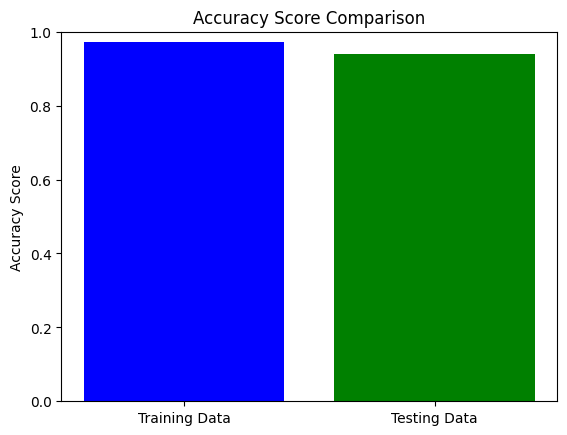

In [29]:
import matplotlib.pyplot as plt

# Assuming 'model' and 'vectorizer' are your trained instances
with open('TrainedModel.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('TrainedVectorizer.pkl', 'rb') as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

# Accuracy score of Training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy score of the training data: ", training_data_accuracy)

# Accuracy Score of Testing data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy score of the test data: ", test_data_accuracy)

# Create a graph for the accuracy score
plt.bar(['Training Data', 'Testing Data'], [training_data_accuracy, test_data_accuracy], color=['blue', 'green'])
plt.title('Accuracy Score Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Set y-axis limit to represent accuracy percentage
plt.show()
